### BFS

In [20]:
BEIJING, CHANGCHUN, URUMQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """BEIJING,CHANGCHUN,URUMQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK""".split(',')

In [21]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMQI: [BEIJING],
    BEIJING: [URUMQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    SHANGHAI: [NEWYORK, WUHAN],
    NEWYORK: [BEIJING, SHANGHAI],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}

In [22]:
connection

{'CHANGCHUN': ['BEIJING'],
 'URUMQI': ['BEIJING'],
 'BEIJING': ['URUMQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK'],
 'SHANGHAI': ['NEWYORK', 'WUHAN'],
 'NEWYORK': ['BEIJING', 'SHANGHAI'],
 'WUHAN': ['SHANGHAI', 'BEIJING', 'GUANGZHOU'],
 'GUANGZHOU': ['WUHAN', 'BANGKOK'],
 'SHENZHEN': ['WUHAN', 'BANGKOK'],
 'BANGKOK': ['SHENZHEN', 'GUANGZHOU']}

In [4]:
import networkx as nx

In [24]:
graph = connection

In [25]:
g = nx.Graph(graph)

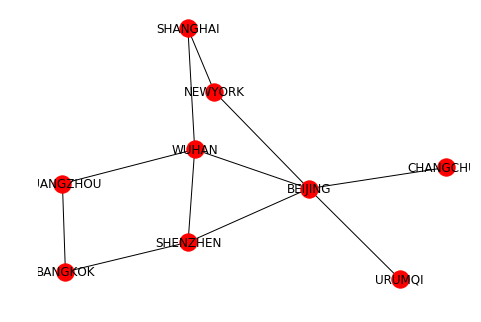

In [26]:
pos = nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)

In [8]:
def navigate_BFS(start, destination, connection_graph):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop()
        frontier = path[-1]
#         print('I am standing at: {}'.format(frontier))
        if frontier in seen: continue
        successors = connection_graph[frontier]

        for s in successors:
#             print('\t------ I am looking forward: {}'.format(s))
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
        
        pathes = sorted(pathes, key=len)
        
        seen.add(frontier)
    

In [9]:
navigate_BFS(WUHAN, SHENZHEN, connection)

['WUHAN', 'GUANGZHOU', 'BANGKOK', 'SHENZHEN']

### 句子生成

In [10]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [11]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return(grammar)

In [12]:
g = parse_grammar(grammar)

In [13]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [14]:
import random

def gene(grammar_parsed, target='sentence'):

    if target not in grammar_parsed: return target

    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [15]:
gene(g)

'一个好看的蓝色的女人看着一个小小的篮球'

In [16]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [17]:
for i in range(10):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

02/85-5/0
3-3/6+2
1*3/7*4
9*8+4+3
7-9*5*8
3+5*7641-8
3-6*0/1
1-9-9/9
6+0*8-4
0+6+8+3
